---

In [323]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [324]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [325]:
import pandas as pd
data_path = '/content/drive/MyDrive/Capstone project/data/survey.csv'
df = pd.read_csv(data_path)

In [326]:
df.sample(10, random_state = 41).T

,149,568,647,686,633,489,313,333,196,447
Timestamp,2014-08-27 12:40:06,2014-08-27 19:45:36,2014-08-28 03:52:05,2014-08-28 09:40:42,2014-08-28 02:49:34,2014-08-27 16:21:55,2014-08-27 14:25:54,2014-08-27 14:37:33,2014-08-27 12:55:01,2014-08-27 15:47:33
Age,29,31,30,33,34,33,26,45,35,26
Gender,Female,male,Male,female,female,Male,Male,Male,Female,F
Country,United States,United States,Australia,United States,United States,Italy,United States,Ireland,United States,United States
state,MI,CA,NaN,NC,CA,NaN,CA,NaN,NY,CA
self_employed,No,No,No,No,No,No,No,Yes,No,No
family_history,No,Yes,No,Yes,No,No,Yes,No,No,No
treatment,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes
work_interfere,NaN,Sometimes,Sometimes,Rarely,Sometimes,Never,Sometimes,Often,Never,Sometimes
no_employees,100-500,More than 1000,26-100,More than 1000,100-500,6-25,More than 1000,1-5,500-1000,100-500


In [327]:
df.shape

(1259, 27)

Count frequency of each category in 'Gender' to spot imbalance or inconsistent labels.

In [328]:
pd.set_option('display.max_columns', 200)
df.columns.tolist()

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [330]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1259,1246,2014-08-27 12:31:41,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1259.0,NaN,NaN,NaN,79428148.311358,2818299442.981952,-1726.0,27.0,31.0,36.0,99999999999.0
Gender,1259,49,Male,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1259,48,United States,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,744,45,CA,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1241,2,No,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,1259,2,No,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment,1259,2,Yes,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_interfere,995,4,Sometimes,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_employees,1259,6,6-25,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1) Cleaning
We'll address common issues found in this dataset:

- **Age**: unrealistic values will be set to NaN then clipped to a sensible range; we also create age buckets.
- **Gender**: normalize noisy entries to `Male`, `Female`, or `Other`.
- **Yes/No/Maybe/Don't know** style answers: standardize and, where useful, map to ordinal/numeric.
- **Country**: group into `Country_top` (top frequency countries) + `Other`.
- **Ordered categories** (e.g., `work_interfere`, `leave`, `no_employees`): convert to ordered integers.


In [331]:
print(df['Gender'].value_counts())

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female                                              2
Female (trans)                                      2
Male-ish                                            1
Trans-female                                        1
Male (CIS)                                          1
Mal                  

Count frequency of each category in 'Gender' to spot imbalance or inconsistent labels.

##classifiers choke on dozens of tiny categories; we reduce to a few meaningful groups: male, female, non-binary, other/missing.

## 1.1) Age cleaning

In [332]:
def clean_age(x, lower=15, upper=100):
    try:
        x = float(x)
    except:
        return np.nan
    if x < lower or x > upper:
        return np.nan
    return x

In [333]:
# Cap to a more typical working-age band for modeling (optional)
df["Age"] = df["Age"].apply(clean_age)
df["Age"] = df["Age"].clip(lower=18, upper=80)

In [334]:
def clean_gender(g):
    if pd.isna(g):return np.na
    s = str(g).strip().lower()
    #common patterns
    male_patterns = ["m","male","man","cis male","cis-man","cis man","mal","maile"]
    # common female indicators']
    female_patterns = ["f","female","woman","cis female","cis-female","cis woman","femake"]
    nb_patterns= ['non-binary','non binary','enby','genderqueer','gender fluid','fluid','agender','trans','queer','androgynous','nonbinary','non binary','nb']
    if any(pattern in s for pattern in male_patterns):
     return 'Male'
    elif any(pattern in s for pattern in female_patterns):
     return 'Female'
    elif any(pattern in s for pattern in nb_patterns):
     return 'Non-binary'
    else:
        return 'Other'

## 2) Gender cleaning

In [335]:
df['Gender'] = df['Gender'].apply(clean_gender)
df.Gender.value_counts()

,count
Gender,
Male,1192
Female,54
Other,7
Non-binary,6


In [336]:
df = df[df['Gender'] != 'Other']
df['Gender'].value_counts()

,count
Gender,
Male,1192
Female,54
Non-binary,6


## 2) Standardize Yes/No style answers to canonical strings

In [337]:
def canon_yn(x):
    x = str(x).strip().lower()
    if x in {"yes","y","true","1"}:
        return "Yes"
    if x in {"no","n","false","0"}:
        return "No"
    if x in {"maybe","not sure","not sure.","unsure","some of them","sometimes","i don't know","dont know","don't know"}:
        # keep as-is for 3-way variables; will map separately where needed
        return "Maybe"
    return x.title()  # e.g., "Don't know", "Very easy"

yn_like_cols = ["self_employed","family_history","treatment","remote_work","tech_company",
                "benefits","care_options","wellness_program","seek_help","anonymity",
                "coworkers","supervisor","obs_consequence",
                "mental_health_interview","phys_health_interview",
                "mental_health_consequence","phys_health_consequence"]

Standardizes messy Yes/No/Maybe answers across multiple columns into clean, consistent strings, and saves them as new _canon columns so the original raw answers remain untouched.

In [338]:
for c in yn_like_cols:
    if c in df.columns:
        df[c] = df[c].apply(canon_yn)

In [339]:
print(df['no_employees'].value_counts())

no_employees
6-25              290
26-100            289
More than 1000    281
100-500           174
1-5               158
500-1000           60
Name: count, dtype: int64


In [340]:
df['work_interfere'].unique()


array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

## 3)**Ordered** categorical mappings

In [341]:
#work_interfere: Never < Rarely < Sometimes < Often
work_interfere_map = {"Never":0, "Rarely":1, "Sometimes":2, "Often":3}
if "work_interfere" in df.columns:
    df["work_interfere"] = df["work_interfere"].map(work_interfere_map)


In [342]:
# Binary encodings for simple yes/no
def to_binary_yes_no(x):
    if x == "Yes": return 1
    if x == "No": return 0
    return np.nan

simple_binary = ["self_employed","family_history","treatment",
                 "remote_work","tech_company","obs_consequence"]
for c in simple_binary:
    if c in df.columns:
        df[c] = df[c].apply(to_binary_yes_no)

In [343]:
# 3-way encodings (Yes/Maybe/No) where "Maybe" means uncertainty/partial
def to_ordinal_yes_maybe_no(x):
    if isinstance(x, str):
        x = x.strip().lower()  # normalize casing/spacing
        if x in ["yes"]:
            return 2
        if x in ["maybe", "don't know", "not sure", "unknown"]:
            return 1
        if x in ["no"]:
            return 0
    return np.nan

three_way_cols = [
    "benefits", "care_options", "wellness_program", "seek_help",
    "coworkers", "supervisor", "mental_health_interview",
    "phys_health_interview", "mental_health_consequence",
    "phys_health_consequence", "mental_vs_physical", "anonymity"
]

for c in three_way_cols:
    if c in df.columns:
        df[c] = df[c].apply(to_ordinal_yes_maybe_no)

In [344]:
# Country grouping (top-N -> keep label; others -> 'Other')
N = 12
if "Country" in df.columns:
    top_countries = df["Country"].value_counts().head(N).index
    df["Country_top"] = np.where(df["Country"].isin(top_countries), df["Country"], "Other")


In [345]:
leave_map = {
    "Very easy": 4,
    "Somewhat easy": 3,
    "Don't know": 2,
    "Somewhat difficult": 1,
    "Very difficult": 0
}
df["leave"] = df["leave"].map(leave_map)


In [346]:
employee_size_map = {
    '1-5': 0,
    '6-25': 1,
    '26-100': 2,
    '100-500': 3,
    '500-1000': 4,
    'More than 1000': 5
}
df['no_employees'] = df['no_employees'].map(employee_size_map)

In [347]:
df.sample(13).T

,760,170,884,615,114,688,825,523,1062,513,910,1182,1008
Timestamp,2014-08-28 11:36:48,2014-08-27 12:48:40,2014-08-28 17:27:03,2014-08-28 00:05:34,2014-08-27 12:31:28,2014-08-28 09:53:57,2014-08-28 15:25:39,2014-08-27 17:19:05,2014-08-29 12:00:33,2014-08-27 16:55:04,2014-08-28 18:18:43,2014-10-02 21:25:16,2014-08-29 09:42:23
Age,31.0,26.0,35.0,30.0,28.0,28.0,48.0,25.0,44.0,39.0,48.0,72.0,39.0
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
Country,Canada,United Kingdom,United States,United States,United States,United States,United States,Bosnia and Herzegovina,United States,United States,Australia,United States,United States
state,NaN,NaN,TN,GA,TX,NM,CA,NaN,FL,WA,NaN,IN,IN
self_employed,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
family_history,1,0,1,0,0,0,1,1,0,0,0,1,1
treatment,0,1,1,1,0,0,0,0,0,0,1,1,1
work_interfere,2.0,2.0,2.0,3.0,NaN,NaN,3.0,1.0,0.0,0.0,2.0,0.0,2.0
no_employees,0,5,2,1,5,2,2,2,0,2,1,4,1


## 4) Handling Missing values After Cleaning

In [348]:
missing_after = df.isna().sum().sort_values(ascending=False)
missing_after_pct = (missing_after/len(df)*100).round(2)
display(pd.DataFrame({"missing_count": missing_after, "missing_%": missing_after_pct}).head(15))

,missing_count,missing_%
comments,1091,87.14
state,511,40.81
work_interfere,264,21.09
self_employed,18,1.44
Age,5,0.40
Country,0,0.00
Timestamp,0,0.00
Gender,0,0.00
treatment,0,0.00
no_employees,0,0.00


For Age

In [349]:
# Fill missing values in Age with median
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

print(f"Filled missing Age values with median: {median_age}")
print(f"Number of missing Age values now: {df['Age'].isna().sum()}")

Filled missing Age values with median: 31.0
Number of missing Age values now: 0


For self_employed

In [350]:
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])


step 1: Choose the related features that can help predict 'work_interfere'
 -------------------------------------------------------
 These features are chosen because they are logically related to work interference:
 - family_history: Whether mental illness runs in the family
 - benefits: Whether the company provides mental health benefits
 - care_options: Whether the person knows about mental health care options at work
 - mental_health_consequence: Perceived consequences of discussing mental health at work

In [351]:
related_cols = ['family_history', 'benefits', 'care_options', 'mental_health_consequence']

Step 4: Calculate the "mode" (most frequent value) of work_interfere for each group
 -------------------------------------------------------
 Group rows by the combination of these related columns
 For each group, find the mode of work_interfere

In [352]:
conditional_modes = (
    df.groupby(related_cols)['work_interfere']
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

 Step 5: Define a function to look up the mode for a given row

In [353]:
def impute_work_interfere(row):
    # If work_interfere is missing, find the mode from the matching group
    if pd.isna(row['work_interfere']):
        return conditional_modes.loc[
            row['family_history'],
            row['benefits'],
            row['care_options'],
            row['mental_health_consequence']
        ]
    # If not missing, keep the original value
    return row['work_interfere']

Step 6: Apply the function to each row of the dataframe


In [354]:
df['work_interfere'] = df.apply(impute_work_interfere, axis=1)

In [355]:
print("Remaining missing values in work_interfere:", df['work_interfere'].isna().sum())

Remaining missing values in work_interfere: 0


In [356]:
# Drop unwanted columns
df = df.drop(['state', 'comments', 'Country', 'Timestamp'], axis=1)

print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'Country_top']


In [357]:
missing_after = df.isna().sum().sort_values(ascending=False)
missing_after_pct = (missing_after/len(df)*100).round(2)
display(pd.DataFrame({"missing_count": missing_after, "missing_%": missing_after_pct}).head(15))

,missing_count,missing_%
Age,0,0.0
Gender,0,0.0
self_employed,0,0.0
family_history,0,0.0
treatment,0,0.0
work_interfere,0,0.0
no_employees,0,0.0
remote_work,0,0.0
tech_company,0,0.0
benefits,0,0.0


In [358]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1252.0,NaN,NaN,NaN,32.074281,7.282914,18.0,27.0,31.0,36.0,72.0
Gender,1252,3,Male,1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1252.0,NaN,NaN,NaN,0.113419,0.31723,0.0,0.0,0.0,0.0,1.0
family_history,1252.0,NaN,NaN,NaN,0.388179,0.48753,0.0,0.0,0.0,1.0,1.0
treatment,1252.0,NaN,NaN,NaN,0.503195,0.50019,0.0,0.0,1.0,1.0,1.0
work_interfere,1252.0,NaN,NaN,NaN,1.436901,1.003597,0.0,0.0,2.0,2.0,3.0
no_employees,1252.0,NaN,NaN,NaN,2.424121,1.705727,0.0,1.0,2.0,4.0,5.0
remote_work,1252.0,NaN,NaN,NaN,0.297923,0.457528,0.0,0.0,0.0,1.0,1.0
tech_company,1252.0,NaN,NaN,NaN,0.819489,0.384766,0.0,1.0,1.0,1.0,1.0
benefits,1252.0,NaN,NaN,NaN,1.080671,0.817892,0.0,0.0,1.0,2.0,2.0


##  Scaling the Features





We’ll keep Gender and Country_top out of the scaling process because scalers can’t handle strings.

In [359]:
from sklearn.preprocessing import StandardScaler

# Make a copy to avoid changing the original
df_scaled = df.copy()

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'Age']

# Scale only numeric columns
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])


##  Correlation Analysis

In [360]:
corr_matrix = df_scaled[numeric_cols].corr()


*  Correlation tells us how strongly two variables are related.

*  Values are between -1 (perfect negative) and 1 (perfect positive).

*  Close to 0 means no clear linear relationship.

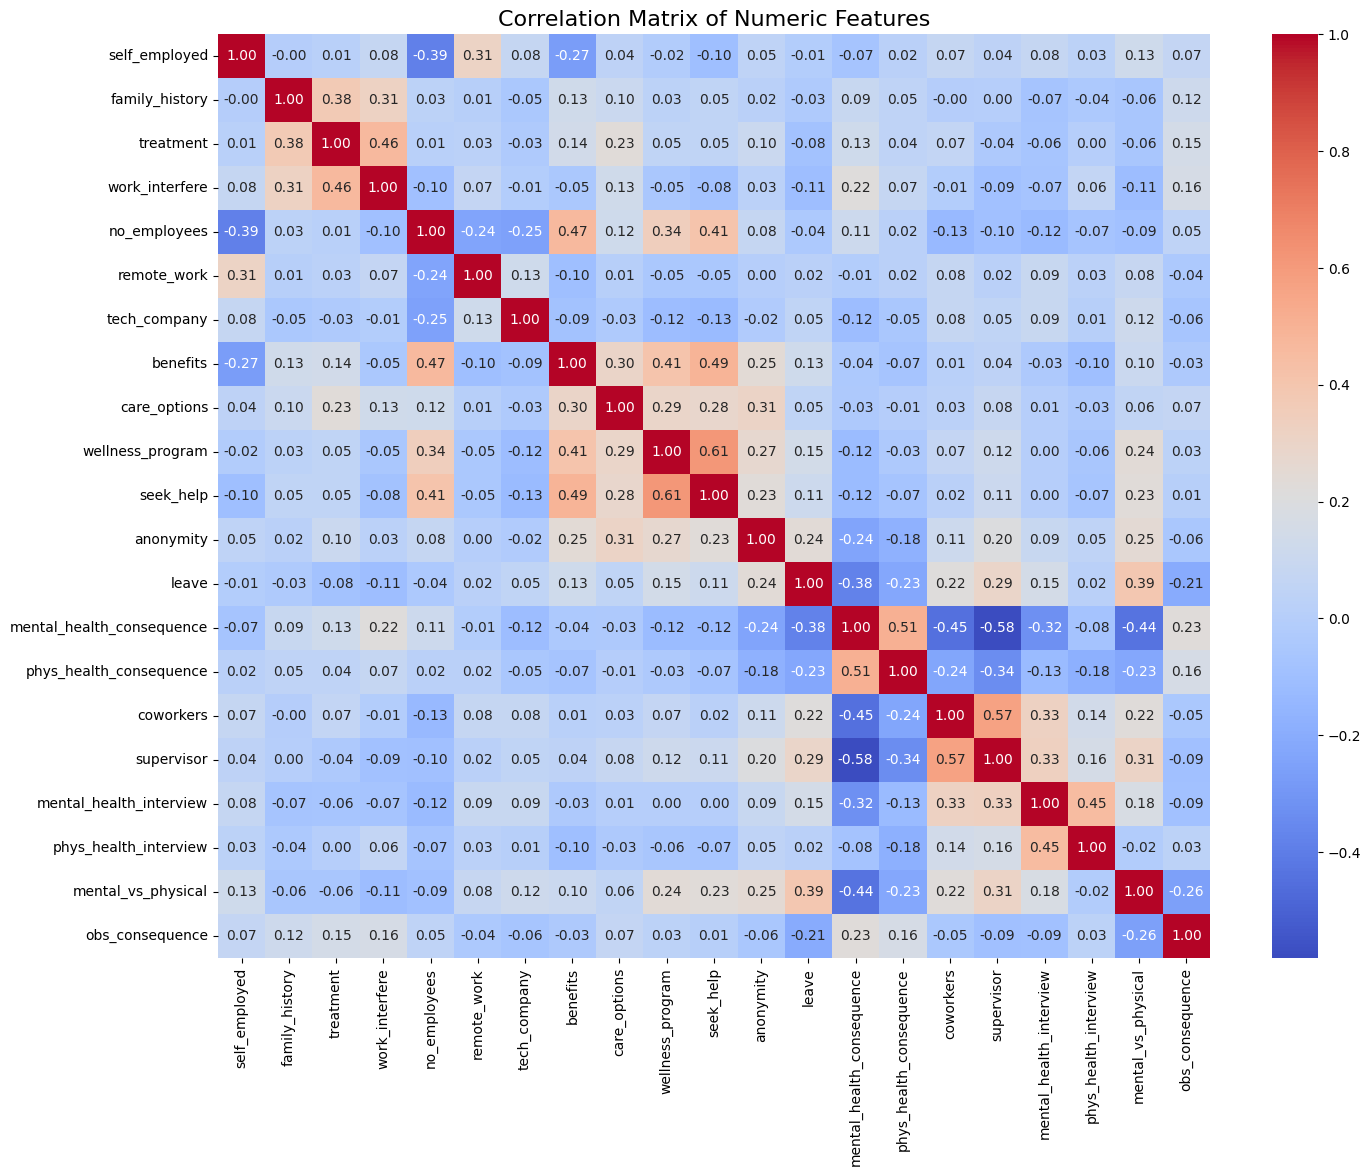

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()


Identify Conceptually Similar & Highly Correlated Features

Now you look for:

High correlation (absolute value ≥ 0.6 or 0.7)

Conceptual overlap — features that measure the same underlying thing

In [362]:
from sklearn.preprocessing import MinMaxScaler

scaler_01 = MinMaxScaler()

df_scaled_01 = df.copy()
df_scaled_01[numeric_cols] = scaler_01.fit_transform(df_scaled_01[numeric_cols])

# Example groupings
df_scaled_01["workplace_support"] = df_scaled_01[["anonymity", "benefits", "care_options", "wellness_program", "seek_help"]].mean(axis=1)

df_scaled_01["health_interview"] = df_scaled_01[["mental_health_interview", "phys_health_interview"]].mean(axis=1)

df_scaled_01["health_consequence"] = df_scaled_01[["mental_health_consequence", "phys_health_consequence", "obs_consequence"]].mean(axis=1)

df_scaled_01["social_support"] = df_scaled_01[["coworkers", "supervisor"]].mean(axis=1)


In [363]:
df = df_scaled_01.drop(columns=[ "anonymity", "benefits", "care_options", "wellness_program", "seek_help",
                                      "mental_health_interview", "phys_health_interview",
                                       "mental_health_consequence", "phys_health_consequence", "obs_consequence",
                                       "coworkers", "supervisor" ])

In [364]:
print(df.shape)
df.sample(12,random_state=41).T

(1252, 16)


,358,883,686,242,640,815,1177,1162,496,340,811,1008
Age,34.0,36.0,33.0,33.0,36.0,39.0,29.0,31.0,36.0,35.0,29.0,39.0
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
self_employed,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
family_history,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
treatment,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
work_interfere,0.666667,0.0,0.333333,0.666667,0.666667,0.666667,0.0,0.666667,0.666667,0.0,0.666667,0.666667
no_employees,0.6,0.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.4,0.6,0.2
remote_work,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
tech_company,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
leave,0.75,0.25,0.75,0.75,1.0,0.5,0.5,0.5,0.25,0.5,0.25,0.75
